In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.6260715e-34
hbar = h/(2*np.pi)
e=1.602e-19
phi0 = hbar/(2*e)

In [2]:
def cos_phi_q( N ):

    out = np.zeros( (N,N), dtype='float64' )
    for i in range(N):
        n = i - (N-1)//2
        for j in range(N):
            m = j - (N-1)//2
            if ( n==(m-1) or n==(m+1) ):
                out[i,j]=1/2

    return out

def Hamiltonian_transmon( N , Ej, Ec ):
    
    H=np.zeros( (N,N) , dtype='float64' )
   
    for i in range(N):
        n = i - (N-1)//2
        H[i,i] = 4*Ec*n**2

    H += -Ej*cos_phi_q( N )
        
    return H

## Transmon/quantromon diagonalisation  [FROM FREQUENCY VALUES] 

== w_i ==
w_i =  [ 0.          4.47119299  8.73117987 12.76077742 16.53204995 20.01990422]
anh =  -0.21120610580436683


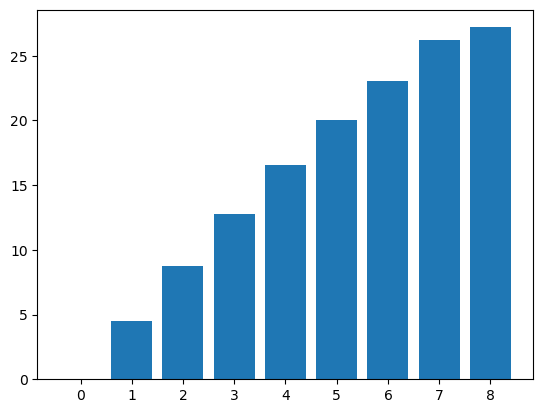

 
== n_q ==
[[-0.000e+00  1.214e+00  0.000e+00  3.500e-02  0.000e+00  2.000e-03]
 [ 1.214e+00  0.000e+00 -1.675e+00 -0.000e+00 -7.400e-02  0.000e+00]
 [ 0.000e+00 -1.675e+00 -0.000e+00 -1.994e+00 -0.000e+00 -1.270e-01]
 [ 3.500e-02 -0.000e+00 -1.994e+00 -0.000e+00 -2.225e+00 -0.000e+00]
 [ 0.000e+00 -7.400e-02 -0.000e+00 -2.225e+00  0.000e+00 -2.381e+00]
 [ 2.000e-03  0.000e+00 -1.270e-01 -0.000e+00 -2.381e+00 -0.000e+00]]


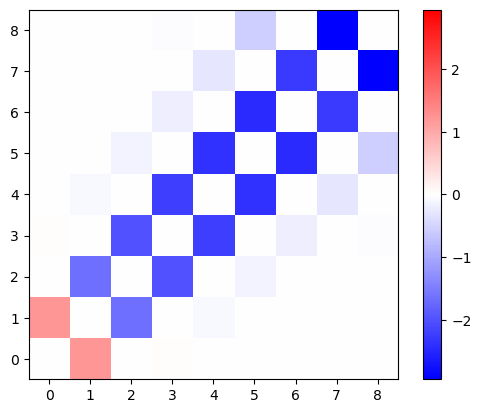

 
== cos( phi_q ) ==
[[ 0.9187  0.     -0.111  -0.     -0.0091 -0.    ]
 [ 0.      0.7559  0.      0.1873 -0.      0.0215]
 [-0.111   0.      0.5921  0.      0.257   0.    ]
 [-0.      0.1873  0.      0.4263 -0.      0.32  ]
 [-0.0091 -0.      0.257  -0.      0.2556  0.    ]
 [-0.      0.0215  0.      0.32    0.      0.0843]]


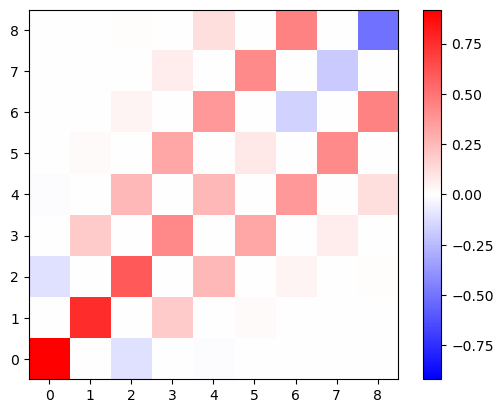

In [6]:
#-- quantromon parameters [FROM ELEMENT VALUES]
N=151
ECq = 0.1897
EJq = 14.368

H=Hamiltonian_transmon( N , EJq, ECq )
e_val, e_vec = np.linalg.eig( H )
sorted_indices = list( np.argsort(e_val) )
e_vec_S = e_vec[:,sorted_indices]
e_val_S = e_val[sorted_indices]
e_val_S=e_val_S-e_val_S[0]


max_lv = 9

print('== w_i ==')
print( 'w_i = ', e_val_S[0:6] )
print( 'anh = ', e_val_S[2]-2*e_val_S[1] )
plt.bar( np.arange(0,max_lv), e_val_S[0:max_lv] )
plt.xticks(range(max_lv))
plt.show()

print(' ')
print('== n_q ==')
n_vals = np.arange( -(N-1)//2, (N-1)//2+1 )
n_mat = np.dot( e_vec_S.T, np.dot( np.diag(n_vals), e_vec_S ) )
print( np.round( n_mat[:6,:6], 3) )
max_amp = np.max( np.abs(n_mat[0:max_lv,0:max_lv]) )
plt.imshow(n_mat[0:max_lv,0:max_lv],cmap='bwr',\
           vmin=-max_amp,vmax=max_amp, origin='lower')
plt.xticks(range(max_lv))
plt.yticks(range(max_lv))
plt.colorbar()
plt.show()

print(' ')
print('== cos( phi_q ) ==')
cos_phi_q_mat = np.dot( e_vec_S.T, np.dot( cos_phi_q( N ), e_vec_S ) )
print( np.round( cos_phi_q_mat[:6,:6], 4) )
max_amp = np.max( cos_phi_q_mat[0:max_lv,0:max_lv] )
plt.imshow(cos_phi_q_mat[0:max_lv,0:max_lv],cmap='bwr',\
           vmin=-max_amp,vmax=max_amp, origin='lower')
plt.xticks(range(max_lv))
plt.yticks(range(max_lv))
plt.colorbar()
plt.show()

In [4]:
np.savetxt( 'FOR_E_lvl_Ec{:4.3f}_Ej{:5.3f}.txt'.format(ECq, EJq), e_val_S, fmt='%20.15f', delimiter='' )
np.savetxt( 'FOR_Cos_Phi_q_Mat_Ec{:4.3f}_Ej{:5.3f}.txt'.format(ECq, EJq), cos_phi_q_mat, fmt='%20.15f', delimiter='' )
np.savetxt( 'FOR_Charge_Mat_Ec{:4.3f}_Ej{:5.3f}.txt'.format(ECq, EJq), n_mat, fmt='%20.15f', delimiter='' )

In [53]:
n_mat.shape

(151, 151)

## Quantromon diagonalisation  [FROM ELEMENT VALUES] 

In [21]:
#-- quantromon parameters [FROM ELEMENT VALUES]
N=151
L=458E-12
Cr=988E-15
Cq=43.2E-15 * 2
LJ=28E-9

EJ=(phi0**2)/LJ
ECq = (e**2)/(2*Cq)
EJr = (phi0**2)*( 2/LJ + 4/L )
ELr = (phi0**2)*( 4/L )
ECr = (e**2)/( 2*( Cq + 4*Cr ) )
eta = np.sqrt( 2*ECr/ELr )
EJq = EJ*(2-eta)
print('Ejq=', (EJq/h)*1e-9 )
print('ECq=', (ECq/h)*1e-9 )

H_Q=Hamiltonian_transmon( N , EJq, ECq )
e_val_Q, e_vec_Q = np.linalg.eig( H_Q )
sorted_indices_Q = list( np.argsort(e_val_Q) )
e_vec_Q_S = e_vec_Q[:,sorted_indices_Q]
e_val_Q_S = e_val_Q[sorted_indices_Q]
e_val_Q_S=e_val_Q_S-e_val_Q_S[0]

print( ( e_val_Q_S[0:5]/h )*1e-9 )
print( (( e_val_Q_S[2]-2*e_val_Q_S[1] )/h )*1e-9 )
print( np.sqrt( np.sum( e_vec_Q_S[:,4]**2 ) ) )
cos_phi_q_mat = np.dot( e_vec_Q_S.T, np.dot( cos_phi_q( N ), e_vec_Q_S ) )
print( np.round( cos_phi_q_mat[:4,:4], 4) )


Ejq= 11.663266400830294
ECq= 0.22414299332568324
[ 0.          4.33631156  8.41595774 12.20924731 15.63681735]
-0.2566653903428682
1.0000000000000002
[[ 0.9019 -0.      0.1327 -0.    ]
 [-0.      0.7052 -0.      0.2223]
 [ 0.1327 -0.      0.5066 -0.    ]
 [-0.      0.2223 -0.      0.3048]]
